In [ ]:
# Codveda Internship - Level 2
# Task: Time Series Analysis on Stock Prices DataSet

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

In [ ]:
df=pd.read_csv('/content/2) Stock Prices Data Set.csv')

In [ ]:
df.head()

,symbol,date,open,high,low,close,volume
0,AAL,2014-01-02,25.0700,25.8200,25.0600,25.3600,8998943
1,AAPL,2014-01-02,79.3828,79.5756,78.8601,79.0185,58791957
2,AAP,2014-01-02,110.3600,111.8800,109.2900,109.7400,542711
3,ABBV,2014-01-02,52.1200,52.3300,51.5200,51.9800,4569061
4,ABC,2014-01-02,70.1100,70.2300,69.4800,69.8900,1148391


In [ ]:
df.isnull().sum()

,0
symbol,0
date,0
open,11
high,8
low,8
close,0
volume,0


In [ ]:
df.dropna(inplace=True)

In [ ]:
df.duplicated().sum()

np.int64(0)

In [ ]:
df['date']=pd.to_datetime(df['date'])

In [ ]:
df = df.sort_values('date')


In [ ]:
df.head()

,symbol,date,open,high,low,close,volume
0,AAL,2014-01-02,25.07,25.82,25.060,25.36,8998943
330,NVDA,2014-01-02,15.92,15.98,15.720,15.86,6502296
329,NUE,2014-01-02,53.29,53.38,52.510,52.73,1611326
328,NTRS,2014-01-02,61.76,61.95,60.665,60.89,1011050
327,NTAP,2014-01-02,41.01,41.01,40.415,40.42,2427140


In [ ]:
x = df.drop(['close','symbol'], axis=1)
y = df['close']

Split the dataset into training and testing sets.

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

Fit a linear regression model using scikit-learn.

In [ ]:
model = LinearRegression()
model.fit(x_train[['open', 'high', 'low', 'volume']], y_train)

LinearRegression()

In [ ]:
y_pred = model.predict(x_test[['open', 'high', 'low', 'volume']])

evaluate the model

In [ ]:
print("R² Score:", r2_score(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))


R² Score: 0.9999511934517344
MSE: 0.5104973239724643


Actual vs Predicted

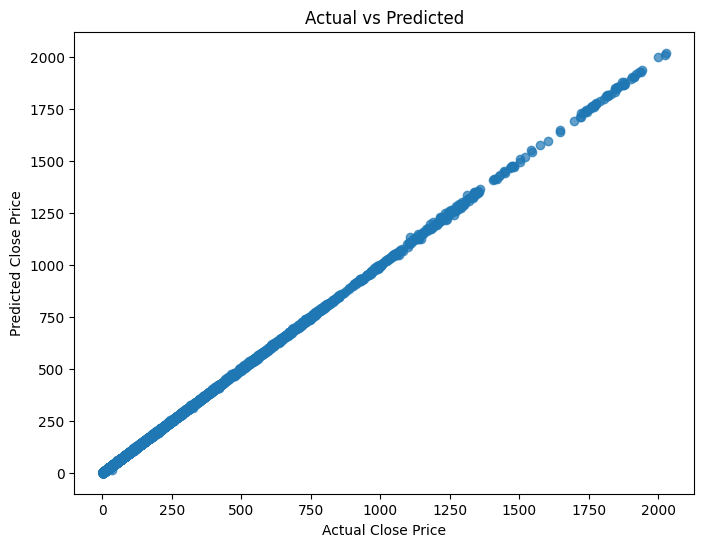

In [ ]:
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.xlabel("Actual Close Price")
plt.ylabel("Predicted Close Price")
plt.title("Actual vs Predicted")
plt.show()


Plot time-series data and identify patterns.

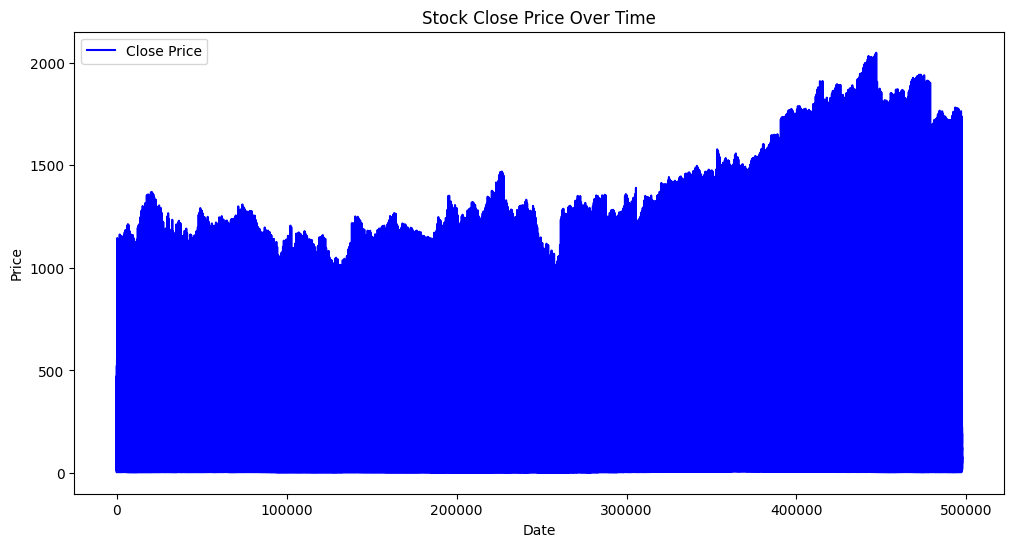

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(df['close'], label="Close Price", color="blue")
plt.title("Stock Close Price Over Time")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.show()

Decompose the series into trend

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(df['close'], model='additive', period=30)


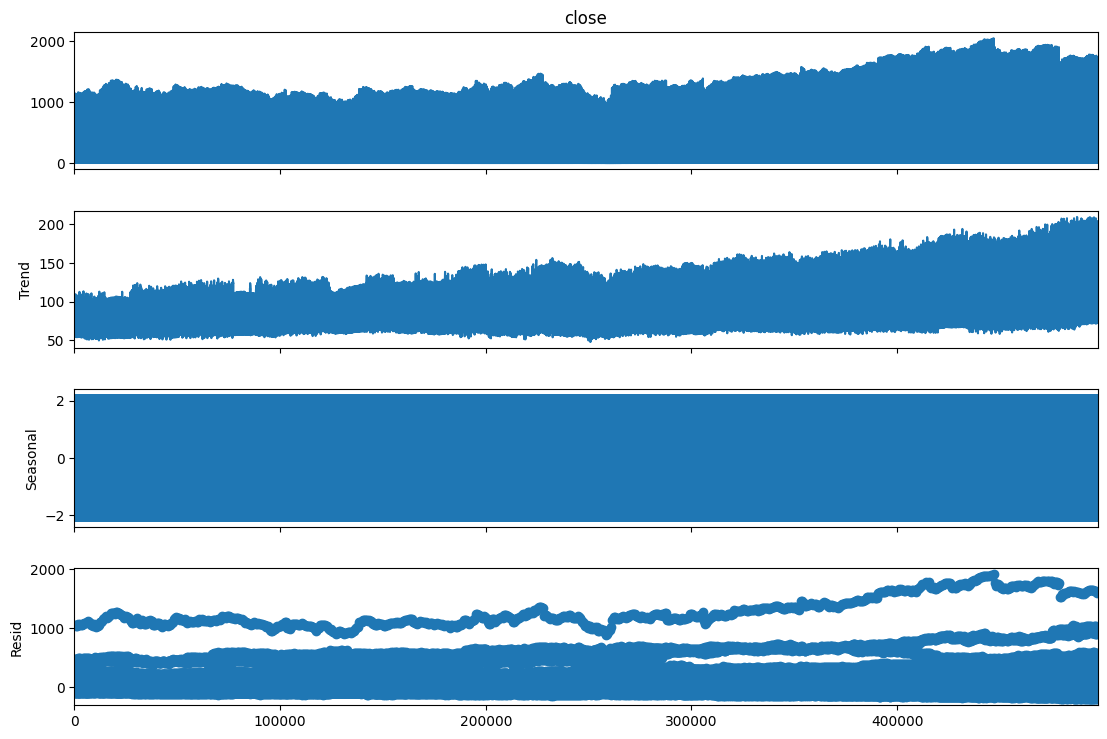

In [ ]:
fig = decomposition.plot()
fig.set_size_inches(12, 8)
plt.show()

Perform moving average smoothing

In [ ]:
df['MA30'] = df['close'].rolling(window=30).mean()
df.dropna(inplace=True) # Drop rows with NaNs introduced by the rolling mean

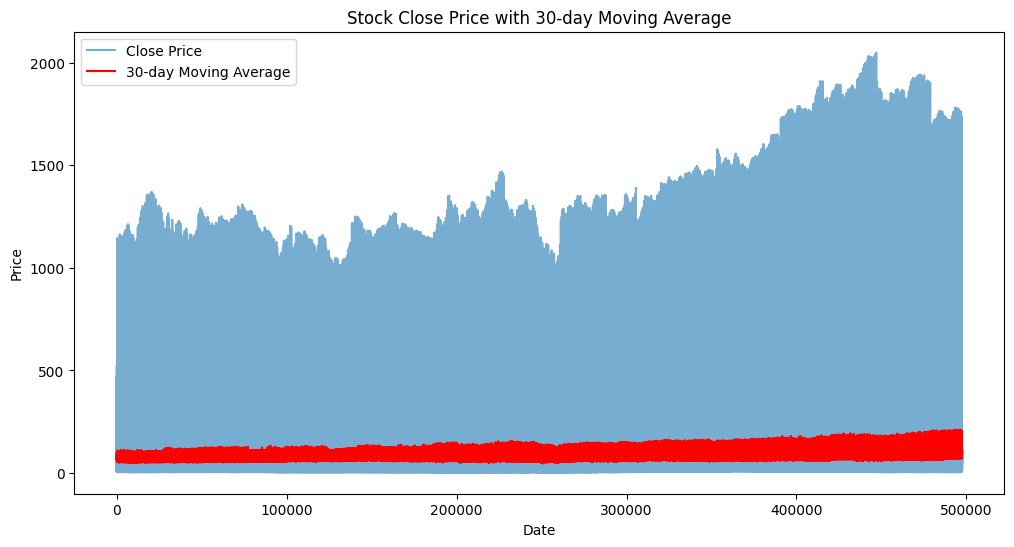

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(df['close'], label="Close Price", alpha=0.6)
plt.plot(df['MA30'], label="30-day Moving Average", color="red")
plt.title("Stock Close Price with 30-day Moving Average")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.show()

Standardize the dataset

In [ ]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="mean")
X_imputed = imputer.fit_transform(x.drop('date', axis=1))

In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_imputed)

determine the optimal
number of clusters

In [ ]:
wcss = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

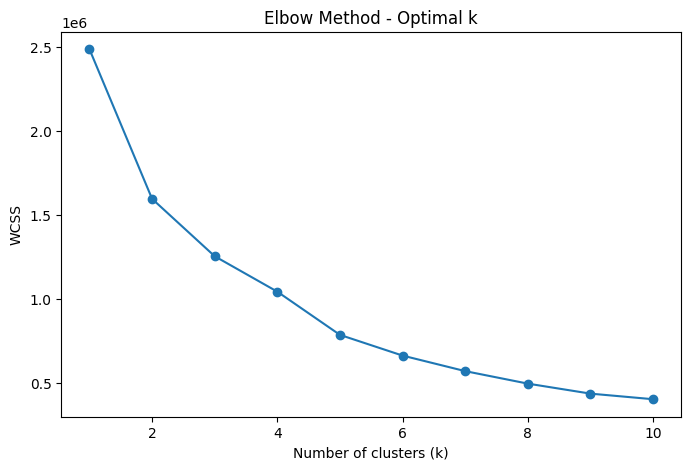

In [ ]:
plt.figure(figsize=(8,5))
plt.plot(range(1, 11), wcss, marker='o')
plt.title("Elbow Method - Optimal k")
plt.xlabel("Number of clusters (k)")
plt.ylabel("WCSS")
plt.show()

Apply K-Means clustering

In [ ]:
# Re-apply imputation and scaling after dropping NaNs from df
imputer = SimpleImputer(strategy="mean")
X_imputed = imputer.fit_transform(df.drop(['date', 'symbol', 'MA30', 'Cluster'], axis=1, errors='ignore')) # Exclude non-numeric and previously added columns

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_imputed)

# Now apply KMeans clustering
kmeans = MiniBatchKMeans(n_clusters=3, random_state=42, batch_size=1000, max_iter=100)
clusters = kmeans.fit_predict(X_scaled)

# Add the cluster assignments to the DataFrame
df['Cluster'] = clusters

display(df.head())

,symbol,date,open,high,low,close,volume,MA30,Cluster
332,NWSA,2014-01-02,18.05,18.170,17.8150,17.95,3673373,54.750380,2
334,OKE,2014-01-02,62.15,62.150,61.0696,61.18,1096077,55.944380,2
360,PNW,2014-01-02,53.00,53.000,52.0400,52.05,1210532,57.150713,2
359,PNR,2014-01-02,77.35,77.686,76.4200,76.87,1063549,57.955380,0
358,PNC,2014-01-02,76.06,77.220,76.0600,76.60,1742055,58.479047,0


In [ ]:
from sklearn.cluster import MiniBatchKMeans

kmeans = MiniBatchKMeans(n_clusters=3, random_state=42, batch_size=1000, max_iter=100)
clusters = kmeans.fit_predict(X_scaled)
df['Cluster'] = clusters

Visualize clusters using 2D scatter plots.

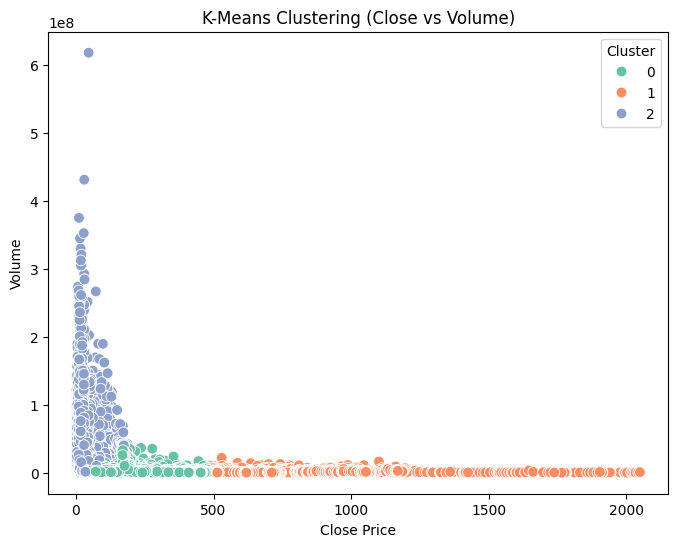

In [ ]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=df['close'], y=df['volume'], hue=df['Cluster'], palette="Set2", s=60)
plt.title("K-Means Clustering (Close vs Volume)")
plt.xlabel("Close Price")
plt.ylabel("Volume")
plt.legend(title="Cluster")
plt.show()